In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_theme()

In [77]:
raw_data = pd.read_csv("2020-2022vs2019_Seated_Diner_Data.csv").transpose()
display(raw_data[77].head())
cambridge = raw_data[77].dropna().iloc[1:]
cambridge.index = pd.to_datetime(cambridge.index)
cambridge = cambridge.apply(lambda per: float(per[:-1]))
cambridge

Unnamed: 0    Cambridge (US)
2020/2/18                NaN
2020/2/19                NaN
2020/2/20                NaN
2020/2/21                NaN
Name: 77, dtype: object

2020-11-09   -87.20
2020-11-10   -78.64
2020-11-11   -83.52
2020-11-12   -85.86
2020-11-13   -80.35
              ...  
2022-02-19   -30.50
2022-02-20   -21.44
2022-02-21   -18.99
2022-02-22   -58.85
2022-02-23   -35.84
Name: 77, Length: 470, dtype: float64

In [60]:
def plot_series(data, title, ylabel, xlabel="Date"):
    plt.figure(figsize=(15,5))
    ax = sns.lineplot(data=data)
    ax.set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.show()

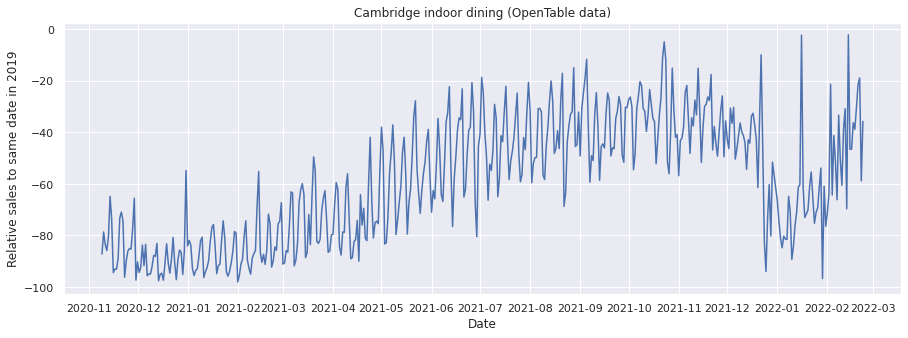

In [61]:
plot_series(cambridge, "Cambridge indoor dining (OpenTable data)", ylabel="Relative sales to same date in 2019")

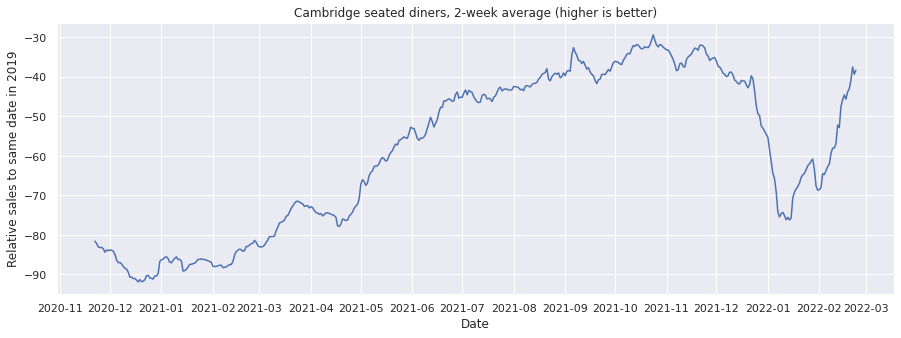

In [78]:
cambridge_14dayaverage = cambridge.rolling(window=14).mean()
plot_series(cambridge_14dayaverage, "Cambridge seated diners, 2-week average (higher is better)", ylabel="Relative sales to same date in 2019")

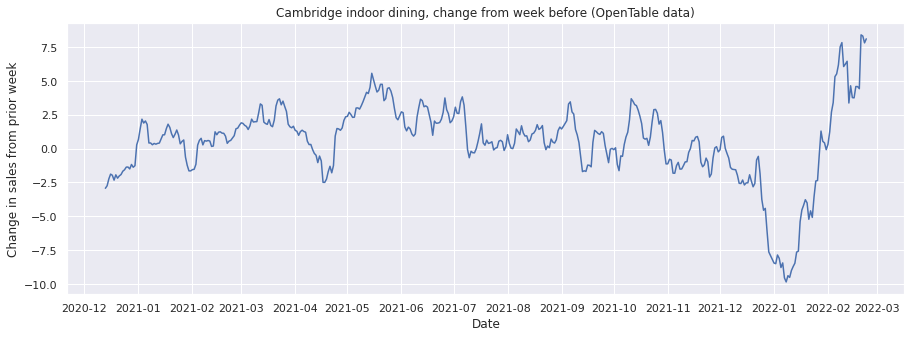

In [73]:
cambridge_change = cambridge_28dayaverage - cambridge_28dayaverage.shift(7)
plot_series(cambridge_change, "Cambridge indoor dining, change from week before (OpenTable data)", ylabel="Change in sales from prior week")